# Link to dataset used

https://www.kaggle.com/datasets/gti-upm/leapgestrecog

# Importing the Libraries

In [8]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


# Loading the images from the directories and extracting the labels

In [4]:
# Define the main directory for the dataset
main_dir = 'leapGestRecog'
image_size = (64, 64)

In [6]:
# Dictionary to store images with labels as keys 
images = {}
labels = []

# Traverse each folder in the main directory
for main_subfolder in sorted(os.listdir(main_dir)):
    main_subfolder_path = os.path.join(main_dir, main_subfolder)
    
    # Only proceed if the item is a directory
    if os.path.isdir(main_subfolder_path):
        for label_folder in sorted(os.listdir(main_subfolder_path)):
            label = label_folder.split('_')[1]  # Extract label name after underscore
            label_folder_path = os.path.join(main_subfolder_path, label_folder)
            
            # Initialize list for each label if not already present
            if label not in images:
                images[label] = []
            
            # Read each image in the label folder
            for image_file in os.listdir(label_folder_path):
                image_path = os.path.join(label_folder_path, image_file)
                
                # Load the image
                img = Image.open(image_path) 
                
                # Convert to grayscale and resize the image using Pillow
                img = img.convert('L')  
                img = img.resize(image_size)  
                img_array = np.array(img) / 255.0  # Normalize to range [0, 1]
                images[label].append(img_array)  # Append image array to label list

# Combine images and labels into arrays for model input
X = []
y = []
label_map = {label: idx for idx, label in enumerate(images.keys())}

for label, imgs in images.items():
    X.extend(imgs)
    y.extend([label_map[label]] * len(imgs))

# Convert lists to numpy arrays and reshape for CNN input
X = np.array(X).reshape(-1, 64, 64, 1)  
y = np.array(y)

# Displaying random samples after importing and Splitting the data

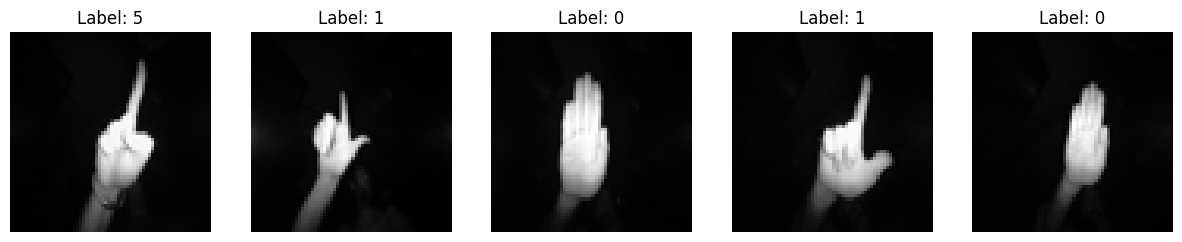

In [13]:
# Function to display a number of random images from the dataset
def display_random_images(images, labels, num_images=5):
    # Randomly select indices without replacement
    random_indices = np.random.choice(len(images), size=num_images, replace=False)

    plt.figure(figsize=(15, 5))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')  # Use squeeze to remove single-dimensional entries
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')  # Hide axes ticks

    plt.show()

# Prepare to display random images
display_random_images(X, y, num_images=5)  

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining and Training the CNN Model 

In [45]:
# Define CNN model
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.25),
    
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.25),
    
    Conv2D(filters = 64,  kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dense(units = 64, activation='relu'),
    Dropout(rate = 0.5),
    Dense(len(label_map), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_split = 0.25, batch_size=32)


Epoch 1/15
375/375 [==============================] - 37s 96ms/step - loss: 1.1544 - accuracy: 0.5970 - val_loss: 0.1657 - val_accuracy: 0.9600
Epoch 2/15
375/375 [==============================] - 37s 98ms/step - loss: 0.3261 - accuracy: 0.8847 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 3/15
375/375 [==============================] - 36s 96ms/step - loss: 0.2010 - accuracy: 0.9300 - val_loss: 0.0233 - val_accuracy: 0.9952
Epoch 4/15
375/375 [==============================] - 36s 96ms/step - loss: 0.1490 - accuracy: 0.9480 - val_loss: 0.0077 - val_accuracy: 0.9985
Epoch 5/15
375/375 [==============================] - 39s 103ms/step - loss: 0.1168 - accuracy: 0.9599 - val_loss: 0.0093 - val_accuracy: 0.9985
Epoch 6/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0935 - accuracy: 0.9688 - val_loss: 0.0037 - val_accuracy: 0.9998
Epoch 7/15
375/375 [==============================] - 39s 104ms/step - loss: 0.0831 - accuracy: 0.9711 - val_loss: 0.0033 - val_accura

# Evaluating the model and plotting the results

In [49]:
# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(test_loss)


125/125 [==============================] - 3s 21ms/step - loss: 8.8680e-04 - accuracy: 1.0000
0.0008868009899742901


In [50]:
print(test_accuracy)

1.0


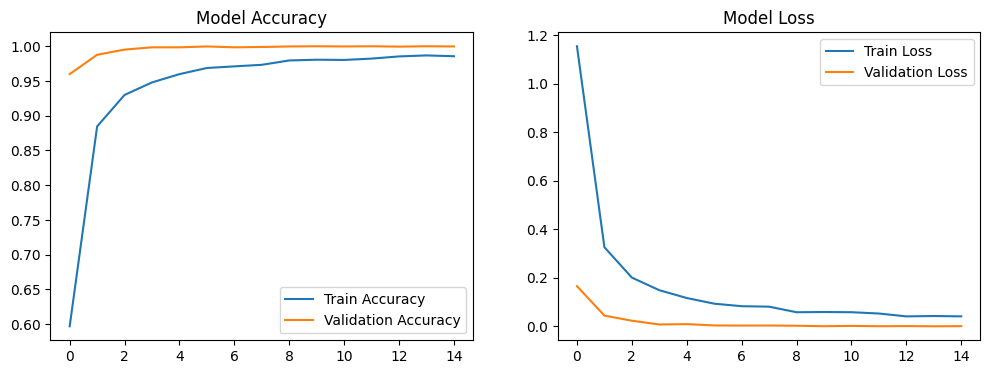

In [51]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# Displaying random test images with predictions

In [52]:
# Display random test images with predictions
def display_random_predictions(model, X_test, y_test, label_map, num_images=5):
    # Generate random indices
    random_indices = np.random.choice(len(X_test), num_images, replace=False)
    
    # Predict the labels for the test set
    predictions = model.predict(X_test)
    
    for i in random_indices:
        plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
        true_label = list(label_map.keys())[y_test[i]]
        predicted_label = list(label_map.keys())[np.argmax(predictions[i])]
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()


125/125 [==============================] - 12s 22ms/step


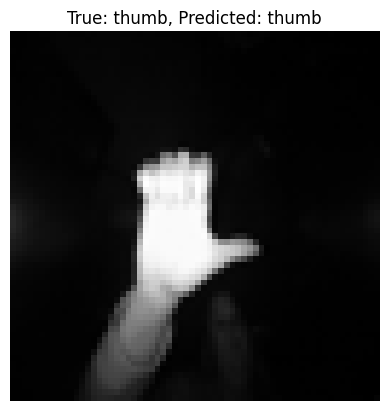

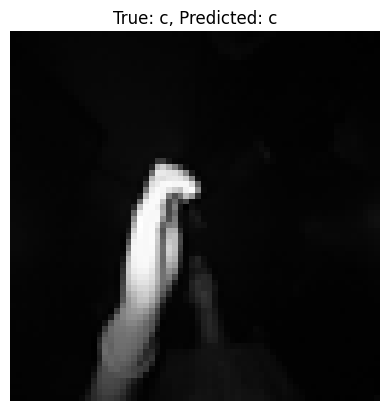

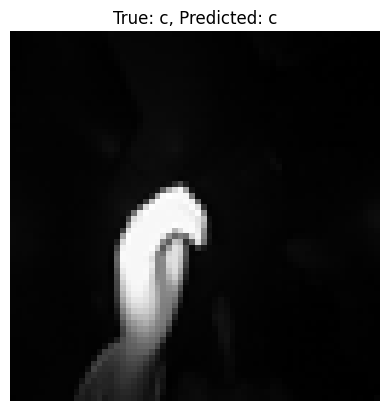

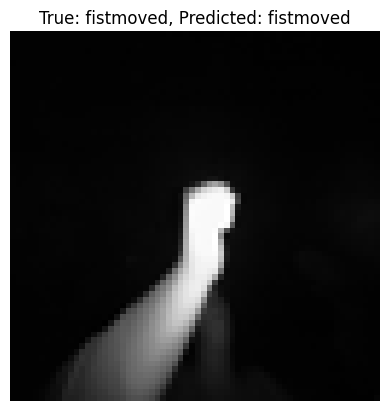

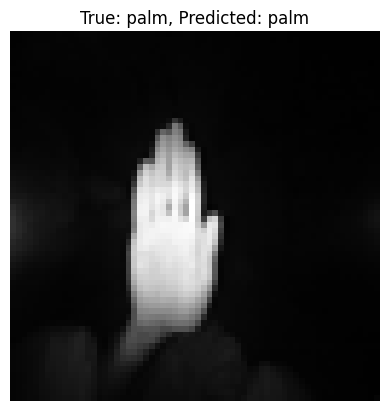

In [53]:
# Call the function to display random test images with predictions
display_random_predictions(model, X_test, y_test, label_map, num_images=5)